### Libraries used

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.integrate import quad

### Functions and constants

In [47]:
global alpha, T, m, n, H, Q, Z
n = 15
H = n*n
alpha = 0
T = 0
m = 0.5
Z = 1 #(?)

In [48]:
def utility_function_per_block(pho):
    if(pho <= 0.5):
        res = 2*pho
    else:
        res = 2*(m-1)*pho + (2 - m)
    return res

In [49]:
def entropy_per_block(pho):
    res = -pho*np.log(pho) - (1-pho)*np.log((1-pho))
    return res

In [50]:
def link_function_per_block(pho):
    a = 0
    b = pho
    I = quad(utility_function_per_block, a, b)
    return I[0]

In [51]:
def thermodynamic_potential_F_per_block(pho):
    res = -T*pho*np.log(pho) - T*(1-pho)*np.log((1-pho)) + alpha*pho*utility_function_per_block(pho) + (1-alpha)*link_function_per_block(pho)
    return res

In [52]:
def utility_function_global(pho_array):
    summation = 0
    for pho in pho_array:
        summation += pho * utility_function_per_block(pho)
    summation *= H
    return summation

In [53]:
def link_function_global(pho_array):
    summation = 0
    for pho in pho_array:
        summation += link_function_per_block(pho)
    summation *= H
    return summation

In [54]:
def thermodynamic_potential_F(pho_array):
    summation = 0
    for pho in pho_array:
        summation += thermodynamic_potential_F_per_block(pho)
    summation *= H
    return summation

In [55]:
# not useful because the results are too large
def probability_function(pho_array):
    res = 1/Z * np.exp(1/T * thermodynamic_potential_F(pho_array))
    return res

In [56]:
"""def partition_function(pho_array):
    summation = 0
    for pho in pho_array:
        summation += np.exp( 1/T * thermodynamic_potential_F(pho))

SyntaxError: incomplete input (3690124766.py, line 1)

### Analysis

#### Utility per block

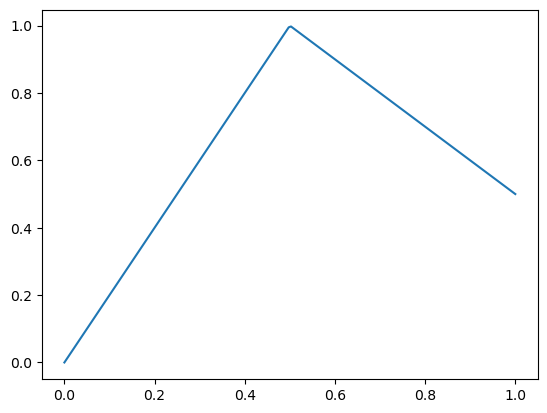

In [57]:
epsilon = 0
pho_min = 0 + epsilon
pho_max = 1 - epsilon
steps = 200
phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
utility = np.zeros(steps)
for i in range(steps):
    utility[i] = utility_function_per_block(phos[i])

plt.figure()
plt.plot(phos,utility)
plt.show()

#### Entropy per block

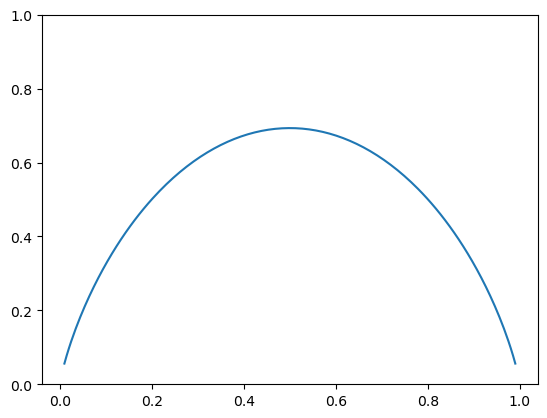

In [58]:
epsilon = 0.01
pho_min = 0 + epsilon
pho_max = 1 - epsilon
phos = np.linspace(pho_min,pho_max,200,endpoint=True)
entropys = entropy_per_block(phos)

plt.figure()
plt.plot(phos,entropys)
plt.ylim(0,1)
plt.show()

#### Link function per block

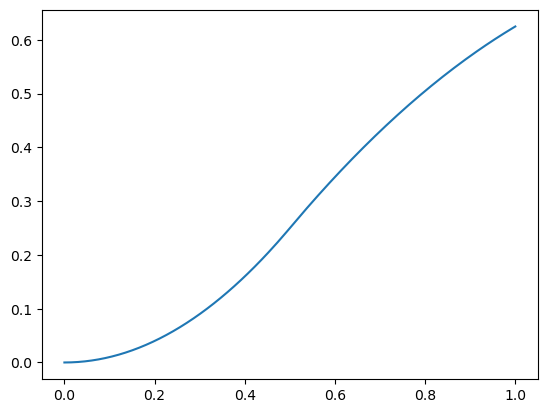

In [59]:
epsilon = 0
pho_min = 0 + epsilon
pho_max = 1 - epsilon
steps = 200
phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
links = np.zeros(steps)
for i in range(steps):
    links[i] = link_function_per_block(phos[i])

plt.figure()
plt.plot(phos,links)
plt.show()

#### System with two blocks

In [68]:
global Q, pho_T, alpha, T
Q = 2
pho_T = 0.5
alpha = 1  #there is another global alpha in cell 2
T = 0        #there is another global T in cell 2

zas 0.001, 9.000222744375144, 17.8209


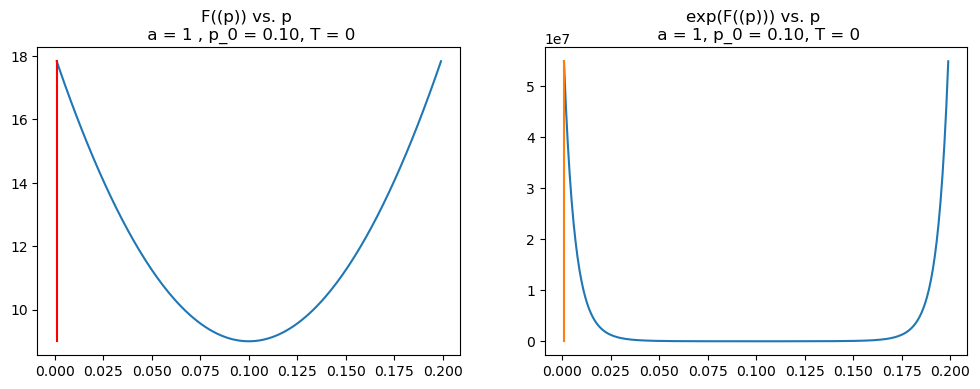

Pho of max F = 0.001
zas 0.001, 20.250504555440525, 40.23090000000001


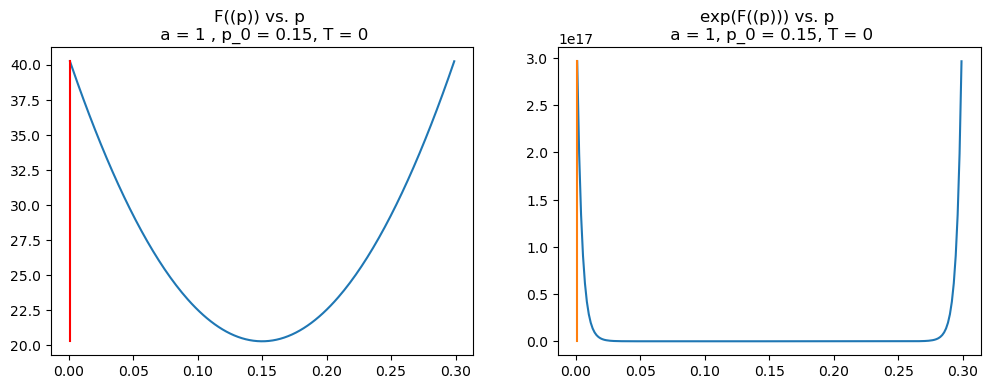

Pho of max F = 0.001
zas 0.001, 36.00090000000001, 71.6409


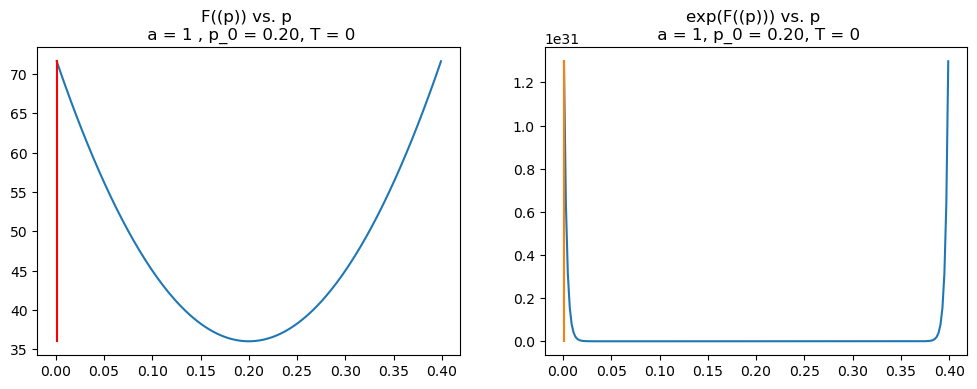

Pho of max F = 0.001
zas 0.001, 56.25140907805359, 112.0509


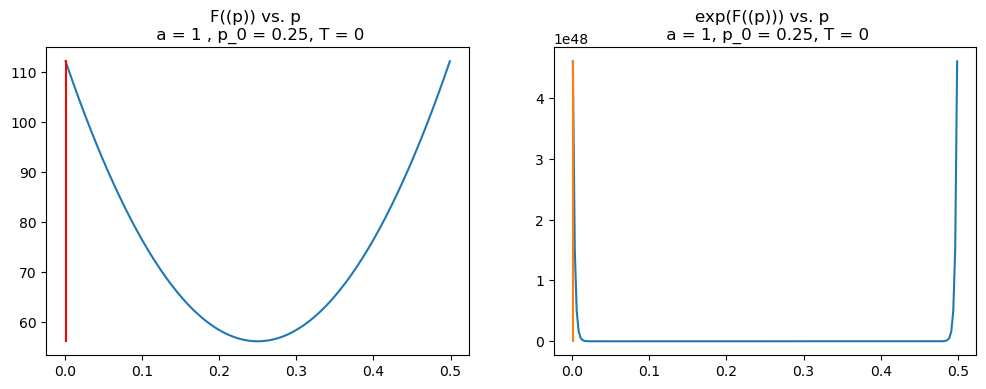

Pho of max F = 0.001
zas 0.001, 81.00203178960129, 121.43272499999999


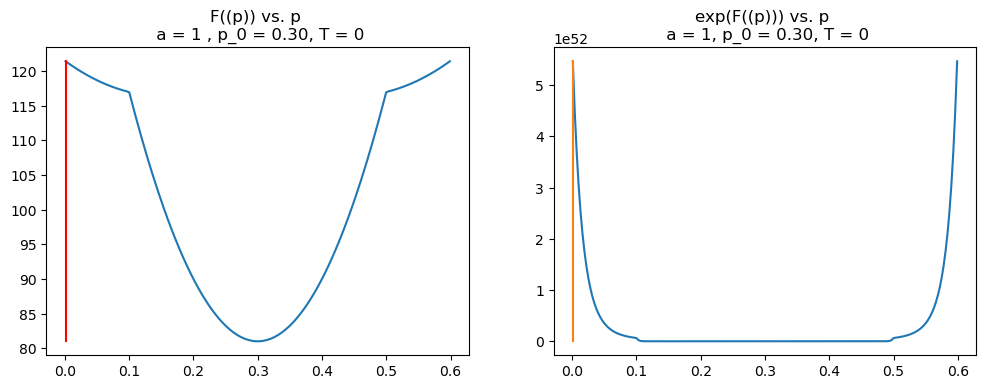

Pho of max F = 0.001
zas 0.19742211055276382, 110.25276813464305, 130.32748770296206


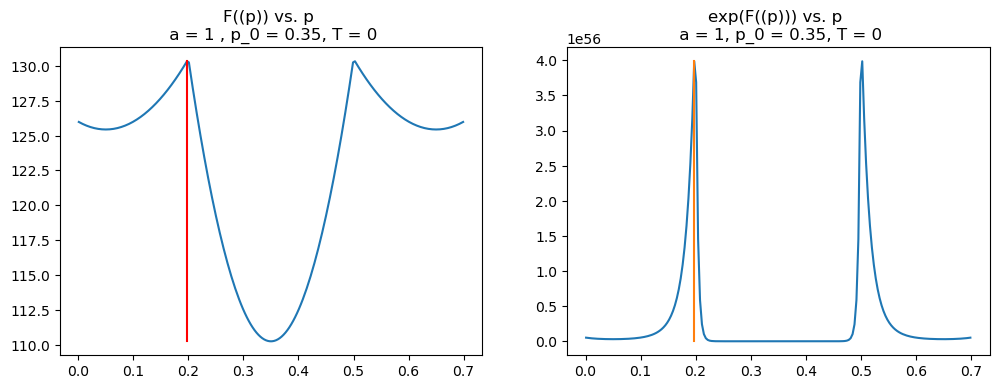

Pho of max F = 0.19742211055276382
zas 0.3017537688442211, 126.022725, 152.68708974268327


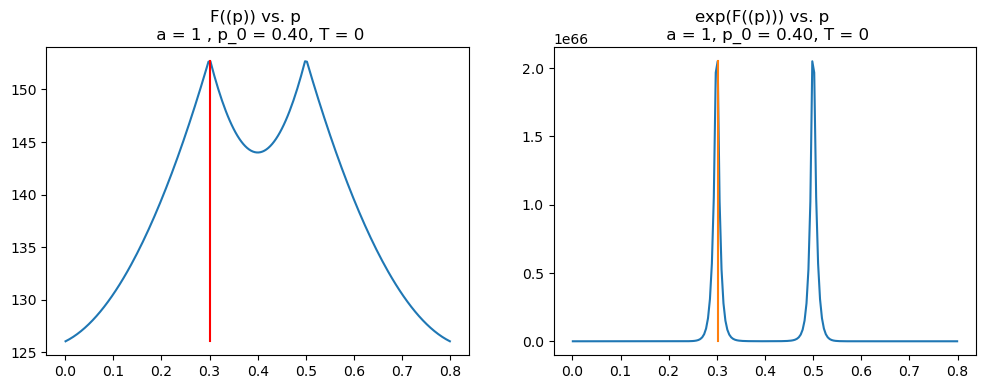

Pho of max F = 0.3017537688442211
zas 0.4026180904522614, 121.56772499999998, 184.27054081715113


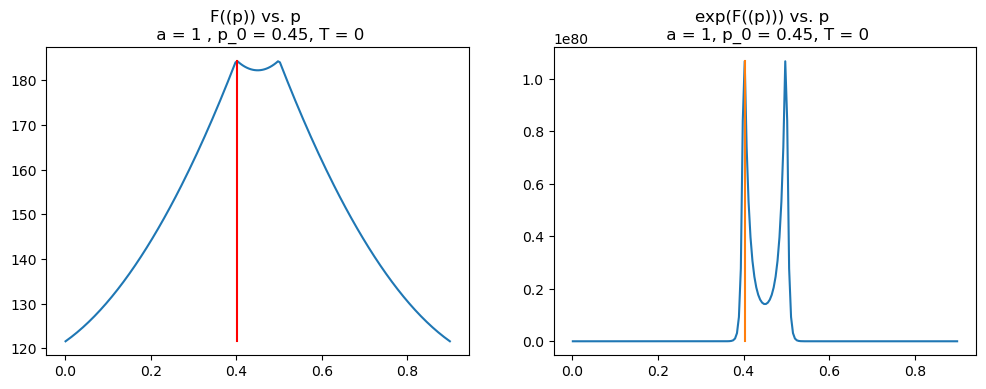

Pho of max F = 0.4026180904522614
zas 0.4974924623115578, 112.612725, 224.15512077283404


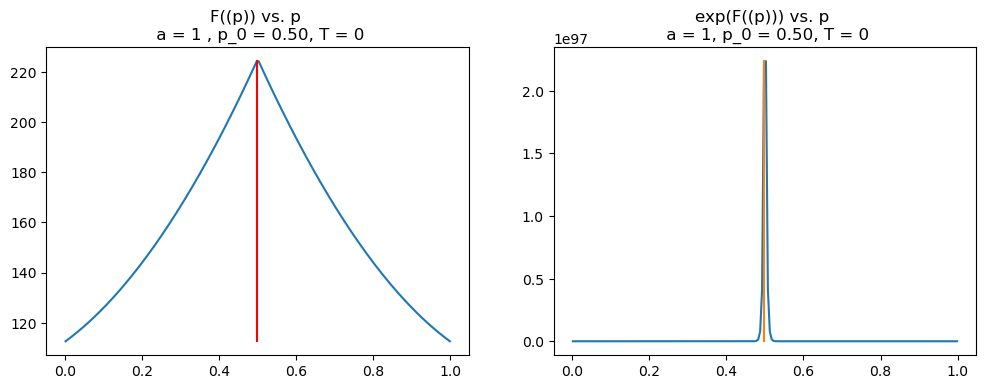

Pho of max F = 0.4974924623115578
zas 0.5522562814070353, 117.20272500000002, 235.12270913739556


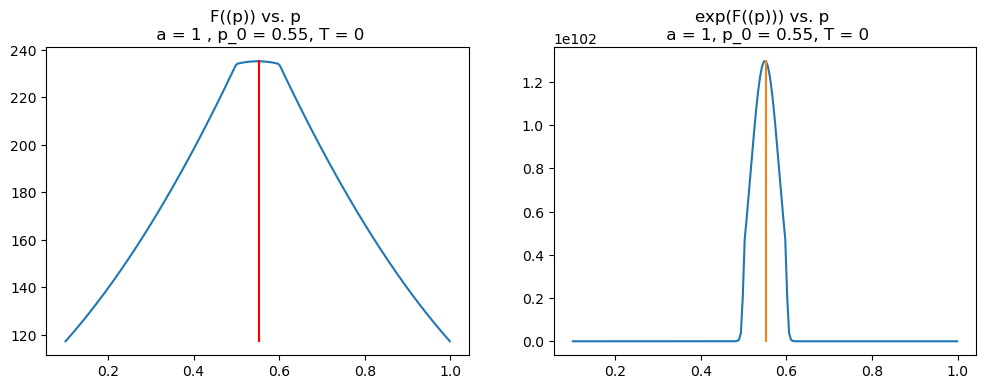

Pho of max F = 0.5522562814070353
zas 0.5979949748743718, 130.792725, 242.9981909434105


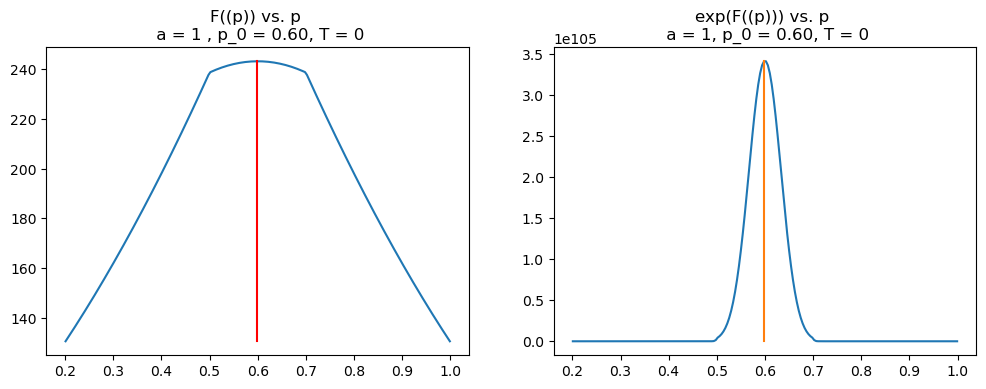

Pho of max F = 0.5979949748743718
zas 0.648246231155779, 153.38272500000002, 248.62361593267843


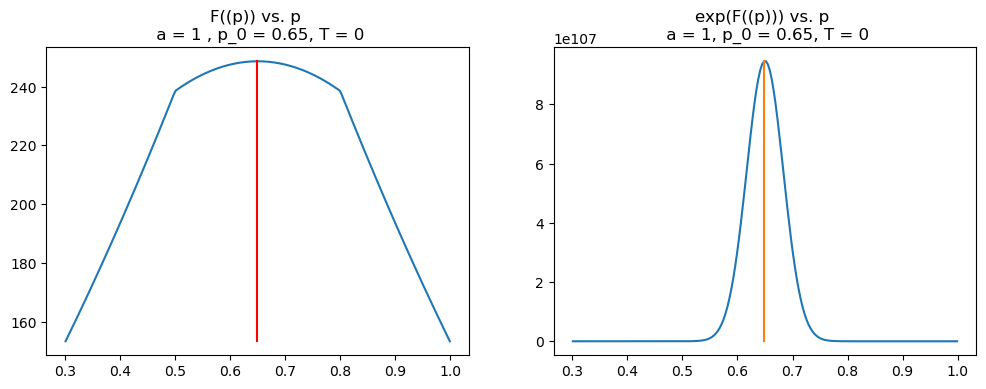

Pho of max F = 0.648246231155779
zas 0.698497487437186, 184.97272500000005, 251.99898410519936


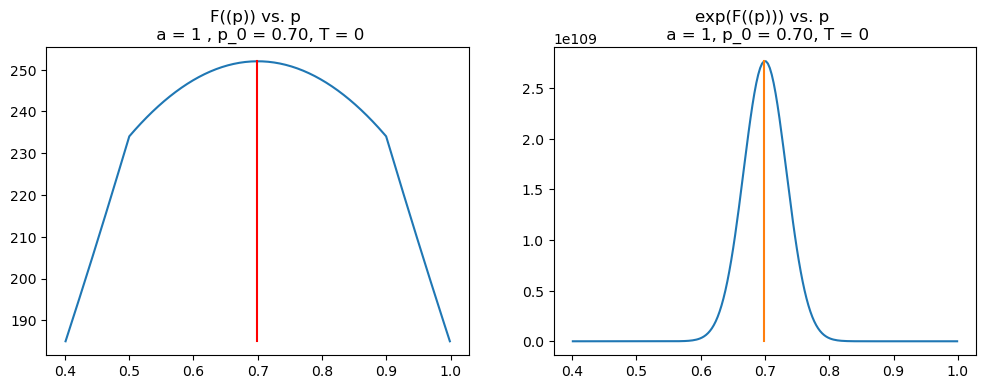

Pho of max F = 0.698497487437186
zas 0.7487487437185929, 225.22455000000002, 253.12429546097323


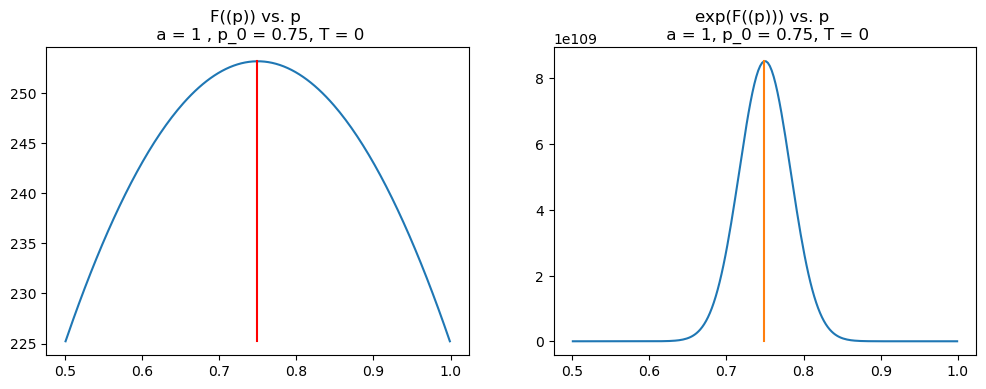

Pho of max F = 0.7487487437185929
zas 0.799, 234.17955000000003, 251.99955


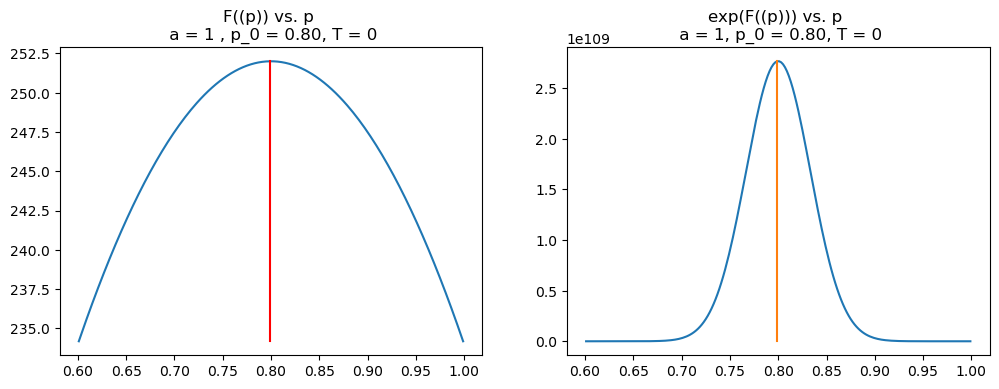

Pho of max F = 0.799
zas 0.849251256281407, 238.63455000000005, 248.62474772227978


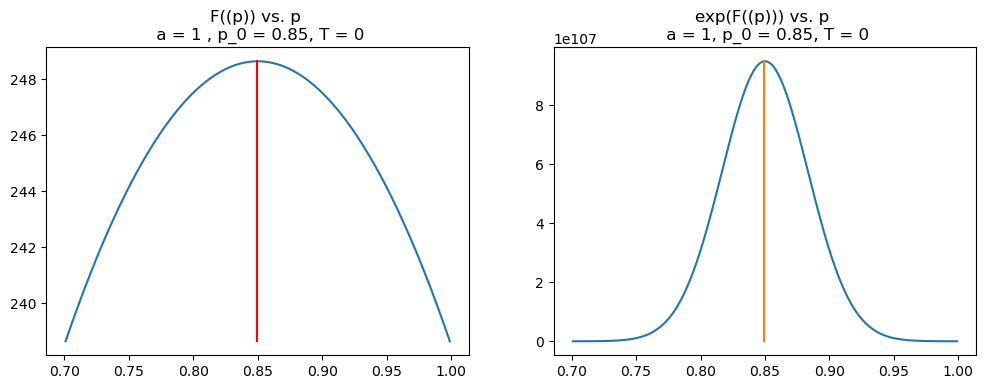

Pho of max F = 0.849251256281407
zas 0.8995025125628141, 238.58955000000003, 242.99988862781245


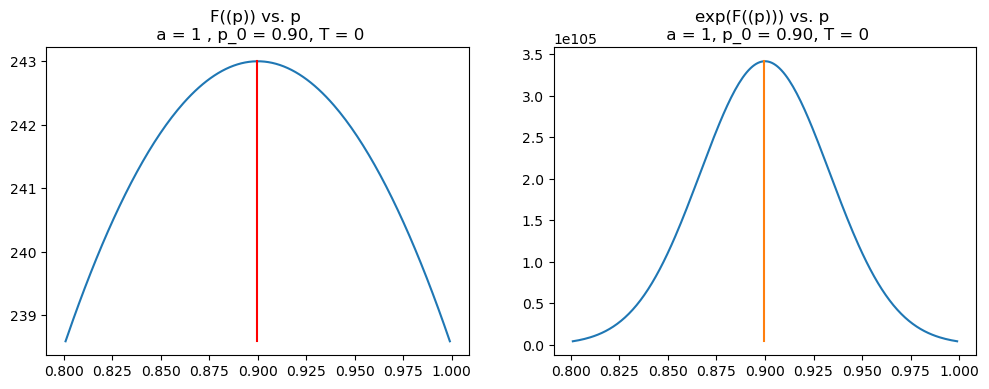

Pho of max F = 0.8995025125628141


In [69]:
pho_Ts = np.linspace(0.1,0.9,17,endpoint=True)
epsilon = 0.001

for k in range(len(pho_Ts)):
    pho_T = pho_Ts[k]
    if pho_T >= 0.5:
        pho_min = 2*pho_T - 1 + epsilon
        pho_max = 1 - epsilon
    else:
        pho_min = 0 + epsilon
        pho_max = 2*pho_T - epsilon

    steps = 200
    phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
    pho_array = np.zeros([steps,2])
    for i in range(steps):
        pho = phos[i]
        pho_2 = 2 * (pho_T - pho/2)
        pho_array[i] = [pho,pho_2]

    potential_Fs = np.zeros(steps)

    max_F = 0
    i_max = 0

    for i in range(steps):
        potential_Fs[i] = thermodynamic_potential_F(pho_array[i])
        if(potential_Fs[i] > max_F):
            max_F = potential_Fs[i]
            i_max = i

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(phos,potential_Fs)
    ax1.plot([phos[i_max],phos[i_max]], [np.min(potential_Fs),potential_Fs[i_max]], color = 'r')
    ax1.set_title(f"F((p)) vs. p \n a = {alpha} , p_0 = {pho_T:.2f}, T = {T}")
    print(f"zas {phos[i_max]}, {np.min(potential_Fs)}, {potential_Fs[i_max]}")


    ax2.plot(phos, np.exp(potential_Fs))
    ax2.plot([phos[i_max],phos[i_max]], [min(np.exp(potential_Fs)),np.exp(potential_Fs[i_max])])
    ax2.set_title(f"exp(F((p))) vs. p \n a = {alpha}, p_0 = {pho_T:.2f}, T = {T}")
    
    plt.show()

    print(f"Pho of max F = {phos[i_max]}")

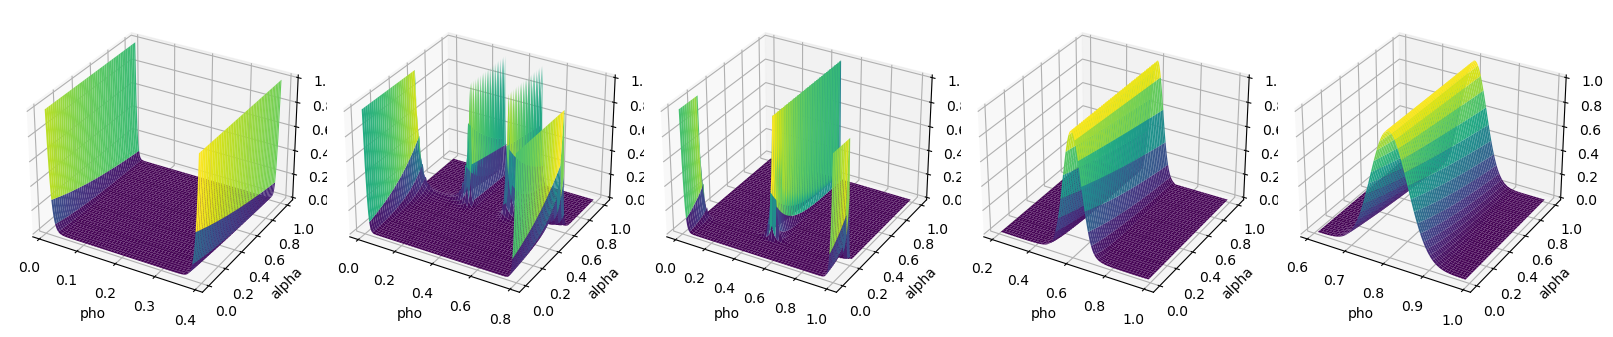

In [67]:
from mpl_toolkits.mplot3d import Axes3D

def thermodynamic_potential_F_per_block_THISCELL(pho, alpha):
    res = -T*pho*np.log(pho) - T*(1-pho)*np.log((1-pho)) + alpha*pho*utility_function_per_block(pho) + (1-alpha)*link_function_per_block(pho)
    return res

def thermodynamic_potential_F_THISCELL(pho_array, alpha):
    summation = 0
    for pho in pho_array:
        summation += thermodynamic_potential_F_per_block_THISCELL(pho, alpha)
    summation *= H
    return summation

fig = plt.figure(figsize=(16, 4))
phos_T = [0.2, 0.4, 0.5, 0.6, 0.8]

for k in range(len(phos_T)):
    pho_T = phos_T[k]
    
    # Data
    epsilon = 0.01

    if pho_T >= 0.5:
        pho_min = 2*pho_T - 1 + epsilon
        pho_max = 1 - epsilon
    else:
        pho_min = 0 + epsilon
        pho_max = 2*pho_T - epsilon

    alpha_min = 0
    alpha_max = 1

    steps = 200

    normalize = True

    phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
    alphas = np.linspace(alpha_min,alpha_max,steps,endpoint=True)

    pho_array = np.zeros([steps,2])
    for i in range(steps):
        pho = phos[i]
        pho_2 = 2 * (pho_T - pho/2)
        pho_array[i] = [pho,pho_2]

    # Z values
    Z = np.zeros([steps,steps])

    for i in range(steps):
        for j in range(steps):
            Z[i,j] = thermodynamic_potential_F_THISCELL(pho_array[j], alphas[i])
            Z[i,j] = np.exp(Z[i,j])

    # normalizing Z
    if normalize:
        for i in range(steps):
            Z_max = max(Z[i])
            Z_min = min(Z[i])
            for j in range(steps):
                Z[i,j] = (Z[i,j] - Z_min) / (Z_max - Z_min)

    # create grid
    phos, alphas = np.meshgrid(phos, alphas)

    # create 3d figure
    ax = fig.add_subplot(int(str(1) + str(len(phos_T)) + str(k+1)), projection='3d')

    # create graph
    surface = ax.plot_surface(phos, alphas, Z, cmap='viridis')

    # labels
    ax.set_xlabel('pho')
    ax.set_ylabel('alpha')
    ax.set_zlabel('Z')
    
    
plt.tight_layout()
plt.show()

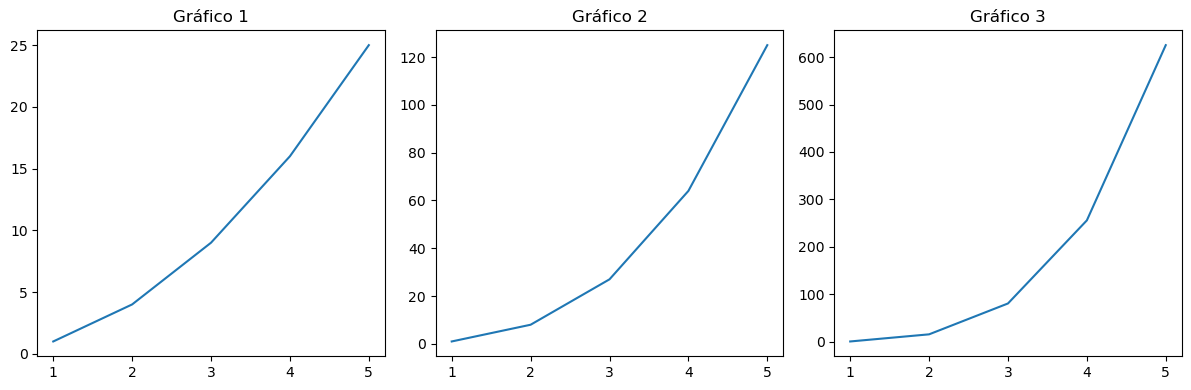

In [184]:
# Crie alguns dados de exemplo para os gráficos
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
y2 = [1, 8, 27, 64, 125]
y3 = [1, 16, 81, 256, 625]

# Crie a primeira figura e o primeiro subplot
plt.figure(figsize=(16, 4))  # Tamanho da figura
plt.subplot(141)  # Subplot 1 de 3

# Plote o primeiro gráfico
plt.plot(x, y1)
plt.title('Gráfico 1')

# Crie o segundo subplot
plt.subplot(142)  # Subplot 2 de 3

# Plote o segundo gráfico
plt.plot(x, y2)
plt.title('Gráfico 2')

# Crie o terceiro subplot
plt.subplot(143)  # Subplot 3 de 3

# Plote o terceiro gráfico
plt.plot(x, y3)
plt.title('Gráfico 3')

# Ajuste o layout para evitar sobreposições
plt.tight_layout()

# Exiba os gráficos
plt.show()
